## 3.1. 문제정의

### 3.1.4. 분석환경 구축

#### 3.1.4.3. 데이터 경로 설정

In [1]:
# 작업 경로 설정
import os
os.chdir(r"C:\dacon\ch03")

#### 3.1.4.4. 패키지 설치

In [2]:
# pandas 설치
!pip install pandas
# numpy 설치
!pip install numpy
# seaborn 설치
!pip install seaborn
# sklearn 설치
!pip install sklearn
# geopy 설치
!pip install geopy
# XGBoost 설치
!pip install xgboost
# lightGBM 설치
!pip install lightgbm

## 3.2. 탐색적 데이터 분석

### 3.2.1. 데이터 설명

In [3]:
import pandas as pd

# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
bts= pd.read_csv('bus_bts.csv')
jeju_life = pd.read_csv('jeju_financial_life_data.csv')
weather = pd.read_csv('weather.csv', encoding='cp949')
rain = pd.read_csv('rain.csv', encoding='utf-8')

In [4]:
# 학습 데이터 상위 5줄 출력
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# 학습 데이터 정보 출력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null object
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: float64(15), int64(3), object

In [6]:
# bus_bts 데이터 상위 5줄 출력
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [7]:
# bus_bts 데이터 정보 출력
bts.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
user_card_id           2409414 non-null float64
bus_route_id           2409414 non-null int64
vhc_id                 2409414 non-null int64
geton_date             2409414 non-null object
geton_time             2409414 non-null object
geton_station_code     2409414 non-null int64
geton_station_name     2409365 non-null object
getoff_date            1513678 non-null object
getoff_time            1513678 non-null object
getoff_station_code    1513678 non-null float64
getoff_station_name    1513639 non-null object
user_category          2409414 non-null int64
user_count             2409414 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [8]:
# jeju_financial_life_data 데이터 상위 5줄 출력
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [9]:
# jeju_financial_life_data 데이터 정보 출력
jeju_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
zip_cd                 10422 non-null int64
year_month             10422 non-null int64
x_axis                 10422 non-null float64
y_axis                 10422 non-null float64
sex                    10422 non-null int64
age                    10422 non-null int64
job_majorc             10422 non-null float64
job_smallc             10422 non-null float64
job_public             10422 non-null float64
job_profession         10422 non-null float64
job_self               10422 non-null float64
job_none               10422 non-null float64
job_other              10422 non-null float64
avg_income             10422 non-null int64
med_income             10422 non-null int64
avg_spend              10422 non-null int64
avg_foreign_spend      10422 non-null int64
avg_debt               10422 non-null int64
avg_debt_credit        10422 non-null int64
avg_debt_noneb         10422 non-null

In [10]:
# weather 데이터 상위 5줄 출력
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [11]:
# weather 데이터 정보 출력
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
날짜      46 non-null object
현재일기    46 non-null object
현재기온    46 non-null float64
체감온도    46 non-null float64
일강수     46 non-null object
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [12]:
# rain 데이터 상위 5줄 출력
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


In [13]:
# rain 데이터 정보 출력
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
지점         184 non-null object
일시         184 non-null object
기온(°C)     184 non-null float64
강수량(mm)    66 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.9+ KB


### 3.2.2. 데이터 시각화를 통한 탐색적 데이터 분석

In [14]:
# 시각화에 필요한 라이브러리 임포트
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 내부에 결과를 출력하도록 설정
%matplotlib inline
# 시각화 한글 폰트 설정
# 윈도우 사용자
plt.rc('font', family='Malgun Gothic')
# Mac 사용자
#plt.rc('font', family='AppleGothic')
# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False) 
# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore') 

In [15]:
# 학습 데이터 복사본 생성
traindata = train.copy()

#### 3.2.2.1. 타깃 변수 분포 확인하기

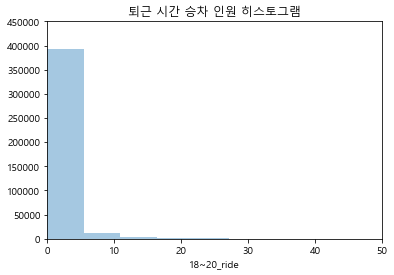

In [16]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 시각화
sns.distplot(traindata['18~20_ride'], kde = False, bins = 50)
plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("퇴근 시간 승차 인원 히스토그램") # 그래프 제목 지정
plt.show() # 그래프 그리기

In [17]:
# 타깃 변수(퇴근 시간 승차 인원) 분포 확인
traindata.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

#### 3.2.2.2. 단일 변수에 따른 타깃 변수의 변화

In [18]:
# 요일 변수 생성
traindata['date'] = pd.to_datetime(traindata['date']) # 날짜형으로 변환
traindata['weekday'] = traindata['date'].dt.strftime('%a') # 요일을 문자형으로 추출해 변수 생성

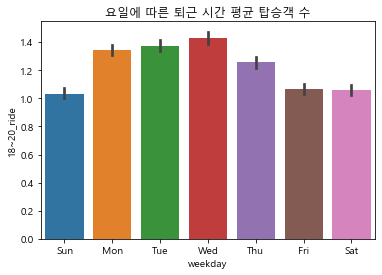

In [19]:
# 요일별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="weekday", y="18~20_ride", data=traindata)
plt.title("요일에 따른 퇴근 시간 평균 탑승객 수")
plt.show()

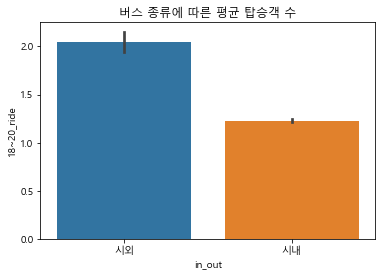

In [20]:
# 버스 종류별 퇴근 시간 평균 탑승객 수 시각화
sns.barplot(x="in_out", y="18~20_ride", data=traindata)
plt.title("버스 종류에 따른 평균 탑승객 수")
plt.show()

In [21]:
# 일별 출근 시간과 퇴근 시간의 합 데이터 생성
traindata['8~10_ride'] = traindata['8~9_ride'] + traindata['9~10_ride']
eda_data = traindata.groupby('date')[['18~20_ride','8~10_ride']].agg('sum').reset_index()
eda_data.head()

,date,18~20_ride,8~10_ride
0,2019-09-01,11537.0,11957.0
1,2019-09-02,20561.0,21844.0
2,2019-09-03,19743.0,25756.0
3,2019-09-04,20133.0,21472.0
4,2019-09-05,20392.0,26331.0


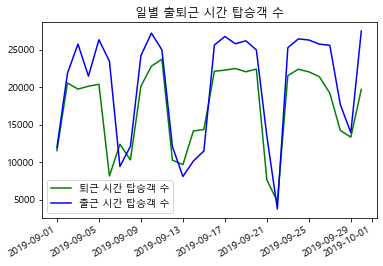

In [22]:
# 일별 출퇴근 시간 탑승객 수 시각화
plt.plot("date", "18~20_ride", "g-", label = "퇴근 시간 탑승객 수", data=eda_data)
plt.plot("date", "8~10_ride", "b-", label = "출근 시간 탑승객 수", data=eda_data)
plt.gcf().autofmt_xdate() # x축의 라벨이 서로 겹치지 않도록 설정
plt.legend(loc=0) # 그래프 상에서 최적의 위치에 범례 표시
plt.title("일별 출퇴근 시간 탑승객 수")   
plt.show()

## 3.3 데이터 전처리

In [23]:
# 학습 데이터와 테스트 데이터를 구분하기 위한 변수 생성
train['cue'] = 0
test['cue'] = 1

# 학습 데이터와 테스트 데이터 통합
df = pd.concat([train, test], axis=0)

### 3.3.1 내부 데이터를 통한 변수 생성

#### 3.3.1.1 탐색적 데이터 분석을 통한 변수

* 요일을 나타내는 변수(weekday)

In [24]:
# datetime 변수형으로 변환
df['date'] = pd.to_datetime(df['date'])
# 요일 추출 (0-월요일~6-일요일)
df['weekday'] = df['date'].dt.weekday

In [25]:
df[['weekday']].head()

,weekday
0,6
1,6
2,6
3,6
4,6


* 요일별 평균 탑승객 수

In [26]:
# 요일별 평균 탑승 승객수를 구하는 함수
def week_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue=="0"').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 'weekdaymean'변수 생성
    df['weekdaymean'] = 1

    # 각 요일에 해당하는 인덱스 추출
    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    # 인덱스를 활용하여 'weekdaymean'의 값을 각 요일에 맞는 평균 탑승 승객수로 변경 
    df.iloc[index0,-1] = train_data.query('weekday==0')['18~20_ride'].mean()
    df.iloc[index1,-1] = train_data.query('weekday==1')['18~20_ride'].mean()
    df.iloc[index2,-1] = train_data.query('weekday==2')['18~20_ride'].mean()
    df.iloc[index3,-1] = train_data.query('weekday==3')['18~20_ride'].mean()
    df.iloc[index4,-1] = train_data.query('weekday==4')['18~20_ride'].mean()
    df.iloc[index5,-1] = train_data.query('weekday==5')['18~20_ride'].mean()
    df.iloc[index6,-1] = train_data.query('weekday==6')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = week_mean()

In [27]:
df[['weekdaymean']].head()

,weekdaymean
0,1.034282
1,1.034282
2,1.034282
3,1.034282
4,1.034282


* 버스 종류별 평균 탑승객 수

In [28]:
# 버스 종류별 평균 탑승 승객수를 구하는 함수
def inout_mean() :
    # 전체 데이터에서 train 데이터에 해당하는 행 추출
    train_data = df.query('cue=="0"').reset_index(drop=True)
    
    # 일괄적으로 1의 값을 가지는 in_out_mean 변수 생성
    df['in_out_mean'] = 1

    # 버스 종류별 인덱스 추출
    in_index = df.query('in_out == "시내"').index # 시내버스
    out_index = df.query('in_out == "시외"').index # 시외버스

    # 인덱스를 활용하여 in_out_mean의 값을 각 버스 종류에 맞는 평균 탑승 승객수로 변경
    df.iloc[in_index,-1] = train_data.query('in_out == "시내"')['18~20_ride'].mean()
    df.iloc[out_index,-1] = train_data.query('in_out == "시외"')['18~20_ride'].mean()
    
    return df

# 함수를 실행하여 변수 생성
df = inout_mean()

In [29]:
df[['in_out_mean']].head()

,in_out_mean
0,2.044345
1,2.044345
2,2.044345
3,1.228499
4,1.228499


* 일별 오전 시간대의 총 탑승객 수

In [30]:
# 날짜별 오전시간에 탑승한 총 승객수
f=df.groupby('date')['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride'].sum().reset_index()

# 변수명 바꾸기
f.columns=['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, f, how='left', on='date')

In [31]:
df[['date','6~7_ride_sum','7~8_ride_sum','8~9_ride_sum','9~10_ride_sum','10~11_ride_sum']].head()

,date,6~7_ride_sum,7~8_ride_sum,8~9_ride_sum,9~10_ride_sum,10~11_ride_sum
0,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
1,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
2,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
3,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0
4,2019-09-01,2942.0,4518.0,5682.0,6275.0,6774.0


#### 3.3.1.2 도메인 조사를 통한 변수

* 배차 간격

In [32]:
# 탑승 날짜를 datetime형으로 변환
bts['geton_time2'] = pd.to_datetime(bts['geton_time'])

# 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호 기준으로 정렬
f = bts.sort_values(by=['geton_date','geton_station_code','bus_route_id','geton_time2'],\
ascending=True).reset_index()

In [33]:
# 반복문 실행 시간이 많이 소요되어 상태 진행률을 확인할 수 있는 tqdm 라이브러리 사용
from tqdm import notebook

# 시차를 넣기 위한 빈 리스트 생성
interval_lst = []
for i in notebook.tqdm(range(0,len(f)-1)):
    # 탑승 날짜, 탑승 정류장 코드, 탑승 노선 번호가 같다면
    if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) & 
        (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) & 
        (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):
        # 탑승 날짜의 차를 interval_lst에 넣기
        interval_lst.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)
    else:
       # 같지 않다면 0을 interval_lst에 넣기
        interval_lst.append(0)

interval_lst.insert(0, '0')

In [34]:
f['interval'] = interval_lst # interval_lst를 'interval'변수로 생성 
# 'interval' 변수의 값을 문자형으로 변환 후 '시:분:초'의 형태로 변환
f['interval'] = f['interval'].astype(str).str[7:].replace('','00:00:00')
f['bus_route_id'] = f['bus_route_id'].astype(object)

In [35]:
# 분으로 변환하는 함수
def get_min(time_str):
    h, m, s = time_str.split(':')
    return (int(h) * 3600 + int(m) * 60 + int(s)) / 60
# 'interval' 함수의 모든 값에 대해 함수 적용하여 나온 값을 time리스트에 넣기
time = []
for i in f['interval'] :
    time.append(get_min(i))

f['time'] = time # time리스트를 'time' 변수로 생성
f['time'] = f['time'].astype(int) # 'time' 변수를 int 타입으로 변경
f = f[f['time'] > 3] # 간격이 3분보다 작은 것 제외 
f = f[f['time'] < 180] # 간격이 3시간보다 큰 것 제외

In [36]:
# 버스 노선별 버스 간격의 평균 'bus_interval’변수 생성
data = f.groupby('bus_route_id')['time'].agg([('bus_interval', 'mean')]).reset_index()
data['bus_interval'] = data['bus_interval'].astype(int)

# 변수 생성에 많은 시간이 소요되므로 csv 파일로 저장
data.to_csv('bus_interval.csv', index = False)

In [37]:
# csv 파일이 성공적으로 저장됐다면 다음 과정부터 진행
import numpy as np
df['bus_route_id'] = df['bus_route_id'].astype(np.int64)
bus_interval = pd.read_csv("bus_interval.csv")

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, bus_interval, how = 'left', on = 'bus_route_id')
df['bus_interval'] = df['bus_interval'].fillna(9999) # 병합 중 생기는 NA값 처리

In [38]:
df[['bus_interval']].head()

,bus_interval
0,34.0
1,34.0
2,34.0
3,34.0
4,34.0


* 수요가 많을 것으로 예상되는 정류장

In [39]:
# school 변수 생성
# 정류장명에 '고등학교'가 포함되어 있는 행 뽑기 
highschool_station = df[df['station_name'].str.contains('고등학교')]
# '고등학교'가 포함되어 있는 정류장명을 중복없이 리스트에 저장
highschool = list(highschool_station['station_name'].unique())
# 정류장명에 '대학교'가 포함되어 있는 행 뽑기
university_station = df[df['station_name'].str.contains('대학교')]
# '대학교'가 포함되어 있는 정류장명을 중복없이 리스트에 저장
university = list(university_station['station_name'].unique())

# '고등학교'와 '대학교' 근처 정류장 구분 함수
def schoolstation(x):
    # highschool 리스트에 정류장명이 포함되어 있다면 1을 반환
    if x in highschool:
        return 1
    # university 리스트에 정류장명이 포함되어 있다면 1을 반환
    elif x in university:
        return 1
    # 둘 다 포함되지 않는 정류장명이라면 0을 반환
    else:
        return 0

# 모든 정류장명에 대해 적용
df['school'] = df['station_name'].apply(schoolstation) 

In [40]:
df[['school']].head()

,school
0,0
1,0
2,0
3,0
4,0


In [41]:
# school변수와 동일한 방법으로 transfer 변수 생성
transfer_station = df[df['station_name'].str.contains('환승')]
transfers = list(transfer_station['station_name'].unique())

airport_station = df[df['station_name'].str.contains('공항')]
airport = list(airport_station['station_name'].unique())

terminal_station = df[df['station_name'].str.contains('터미널')]
terminal = list(terminal_station['station_name'].unique())

# 항상 수요가 많은 정류장 구분 함수
def transfer_station(x):
    if x in transfers:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    else:
        return 0

df['transfer'] = df['station_name'].apply(transfer_station)

In [42]:
df[['transfer']].head()

,transfer
0,0
1,0
2,0
3,1
4,0


* 연휴

In [43]:
# 날짜에서 연휴 구분 함수
def holiday(x):
    # 공휴일이라면 1을 반환
    if x in ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']:
        return 1
    else:
        # 공휴일이 아니라면 0을 반환
        return 0
# 모든 날짜에 적용
df['holiday'] = df['date'].apply(holiday)
df[['holiday']].head()

,holiday
0,0
1,0
2,0
3,0
4,0


#### 3.3.1.3. 시간대를 활용한 변수

* 승하차 시간대 통합 변수(t~t+2)

In [44]:
# 오전시간대에 2시간동안 승차한 인원수의 합계
df['68a'] = df['6~7_ride'] + df['7~8_ride'] 
df['810a'] = df['8~9_ride'] + df['9~10_ride']
df['1012a'] = df['10~11_ride'] + df['11~12_ride']

# 오전시간대에 2시간동안 하차한 인원수의 합계
df['68b'] = df['6~7_takeoff'] + df['7~8_takeoff'] 
df['810b'] = df['8~9_takeoff'] + df['9~10_takeoff']
df['1012b'] = df['10~11_takeoff'] + df['11~12_takeoff']

In [45]:
df[['68a', '810a', '1012a', '68b', '810b', '1012b']].head()

,68a,810a,1012a,68b,810b,1012b
0,1.0,7.0,8.0,0.0,0.0,0.0
1,5.0,6.0,11.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0
3,17.0,32.0,30.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


* 오전 시간의 승객 수

In [46]:
# 오전 시간(6시~12시)에 승차한 승객 수의 합계
df['ride_sum'] = df[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
                     '10~11_ride', '11~12_ride']].sum(axis=1)

# 오전 시간(6시~12시)에 하차한 승객 수의 합계
df['takeoff_sum'] = df[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', 
'9~10_takeoff', '10~11_takeoff', '11~12_takeoff']].sum(axis=1)

In [47]:
df[['ride_sum', 'takeoff_sum']].head()

,ride_sum,takeoff_sum
0,16.0,0.0
1,22.0,0.0
2,4.0,0.0
3,79.0,0.0
4,0.0,1.0


In [48]:
# 'bus_route_id'와 'station_code'를 결합해 route_station 생성
df['route_station'] = df['bus_route_id'].astype(str) + ',' + df['station_code'].astype(str)

# 버스노선별 오전시간의 총 승객수와 평균 승객수 구하기
data = df.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()

# 변수명을 route_station, 1012a_mean, 1012a_sum으로 바꾸기
data.rename(columns = {'mean':'1012a_mean', 'sum':'1012a_sum'}, inplace=True)

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, data, how='left', on='route_station')

In [49]:
df[['1012a_mean','1012a_sum']].head()

,1012a_mean,1012a_sum
0,5.304348,244.0
1,11.608696,534.0
2,2.304348,106.0
3,36.673913,1687.0
4,0.564103,22.0


#### 3.3.1.4. bus_bts를 활용한 변수

* 카테고리별 승객 수의 합과 비율

In [50]:
# 카테고리별 승객 수의 합
def category_people():
    # df와 병합을 위해 bus_route_id의 타입을 str로 변환
    bts['bus_route_id'] = bts['bus_route_id'].astype(str)

    # bus_route_id와 user_category별 승객 수의 합
    f = bts.groupby(['bus_route_id','user_category'])['user_count'].agg([('승객수', 'sum')]).reset_index()

    # bus_route_id별 user_category 변수의 승객수의 피벗 테이블 형태로 변환
    g = pd.pivot_table(f, values='승객수', index='bus_route_id', 
                       columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult','kids','teen','elder','jang','jang2','ugong','ugong2']
    g = g[['bus_route_id', 'adult','kids','teen','elder']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, g, how='left', on='bus_route_id')
                 
    return merge_data

# bus_route_id의 타입을 str로 통일시켜준 뒤, 함수를 실행하여 변수 생성
df['bus_route_id'] = df['bus_route_id'].astype(str)
df = category_people()

In [51]:
df[['adult','kids','teen','elder']].head()

,adult,kids,teen,elder
0,8158.0,72.0,38.0,0.0
1,8158.0,72.0,38.0,0.0
2,8158.0,72.0,38.0,0.0
3,8158.0,72.0,38.0,0.0
4,8158.0,72.0,38.0,0.0


In [52]:
# 카테고리별 승객 비율
def category_people_ratio() :

    # bus_route_id별 user_category의 전체 합
    f_all = bts.groupby('bus_route_id')['user_count'].agg([('전체', 'sum')]).reset_index()

   # bus_route_id와 user_category별 승객 수의 합
    f_sum = bts.groupby(['bus_route_id','user_category'])['user_count'].agg([('승객수', 'sum')]).reset_index()
    
    # 승객 수의 합을 전체 합으로 나눠줘 비율을 구함
    data = pd.merge(f_all, f_sum, on='bus_route_id')
    data['비율'] = data['승객수'] / data['전체']

   # 피벗 테이블을 통해 bus_route_id별 user_category변수의 승객 비율 형태로 변환
    data = pd.pivot_table(data, values='비율', index='bus_route_id', 
                          columns='user_category',fill_value=0).reset_index()
    data.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop',
                    'elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = data[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    # 기존의 데이터프레임에 새로운 변수를 병합
    merge_data = pd.merge(df, f, how='left', on='bus_route_id')

    return merge_data

# 함수를 실행하여 변수 생성
df = category_people_ratio()

In [53]:
df[['adult_prop','kids_prop','teen_prop','elder_prop']].head()

,adult_prop,kids_prop,teen_prop,elder_prop
0,0.986696,0.008708,0.004596,0.0
1,0.986696,0.008708,0.004596,0.0
2,0.986696,0.008708,0.004596,0.0
3,0.986696,0.008708,0.004596,0.0
4,0.986696,0.008708,0.004596,0.0


In [54]:
# 연속형 변수의 결측치를 평균값으로 처리할 수 있도록SimpleImputer를 사용
from sklearn.impute import SimpleImputer  

na_col = ['adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop', 'elder_prop']
# 평균값으로 결측치 처리를 위해 strategy옵션을 mean으로 설정 
imputer = SimpleImputer(strategy="mean")
# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

#### 3.3.1.5 좌표를 활용한 변수

In [55]:
import geopy.distance

coords_jejusi = (33.500770, 126.522761) # 제주시의 위도 경도
coords_seoquiposi = (33.259429, 126.558217) # 서귀포시의 위도 경도

# 제주시와의 거리
df['dis_jejusi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                            coords_jejusi).km for i in range(len(df))]
# 서귀포시와의 거리
df['dis_seoquiposi'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                            coords_seoquiposi).km for i in range(len(df))]

In [56]:
df[['dis_jejusi', 'dis_seoquiposi']].head()

,dis_jejusi,dis_seoquiposi
0,2.954920,26.256744
1,3.720275,26.403025
2,5.036124,25.893305
3,2.864166,27.997494
4,29.040353,13.574693


* 탑승하는 승객의 수가 많은 버스정류장과의 거리

In [57]:
# 승차 인원 상위 10개의 버스정류장 좌표
coords_jejusicheong1 = (33.49892, 126.53035) # 제주시청(광양 방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) # 제주국제공항(구제주 방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) # 한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) # 제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) # 동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) # 제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) # 중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양 방면)의 위도 경도

# 승차 인원 상위 10개의 버스정류장 좌표와 각 정류장의 지구 표면에서 두 점 사이의 거리를 구함
df['dis_jejusicheong1'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                   coords_jejusicheong1).km for i in range(len(df))]
df['dis_jejuairport'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                 coords_jejuairport).km for i in range(len(df))]
df['dis_hallahosp'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                               coords_hallahosp).km for i in range(len(df))]
df['dis_rotary'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                            coords_rotary).km for i in range(len(df))]
df['dis_jejucenterhigh'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                    coords_jejucenterhigh).km for i in range(len(df))]
df['dis_jejumarket'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                coords_jejumarket).km for i in range(len(df))]
df['dis_jejusclass'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                coords_jejusclass).km for i in range(len(df))]
df['dis_centerroad'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                                coords_centerroad).km for i in range(len(df))]
df['dis_fiveway'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                             coords_fiveway).km for i in range(len(df))]
df['dis_law'] = [geopy.distance.geodesic((df['latitude'].iloc[i],df['longitude'].iloc[i]), 
                                         coords_law).km for i in range(len(df))]

In [58]:
df[['dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary', 'dis_jejucenterhigh', 
    'dis_jejumarket', 'dis_jejusclass', 'dis_centerroad', 'dis_fiveway', 'dis_law']].head()

,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law
0,3.547051,1.853545,0.719000,0.330360,4.226827,4.030090,1.897319,3.632769,1.243233,3.835351
1,4.336294,2.057088,0.088058,1.109489,5.029806,4.704476,1.501101,4.311404,0.493820,4.640172
2,5.611975,3.316057,1.448297,2.410695,6.156335,6.069228,0.957447,5.675079,0.873821,5.840420
3,3.596334,0.127071,1.889890,1.639020,4.718848,3.311940,3.432034,2.967079,2.376926,4.149595
4,29.106917,28.818039,26.819826,27.283840,28.424280,30.466215,25.277182,30.112554,26.384623,28.724248


### 3.3.2. 외부 데이터를 통한 변수 생성

#### 3.3.2.1. 날씨를 활용한 변수

* 버스정류장과 각 측정소의 거리

In [59]:
# 측정소별 위도, 경도
jeju = (33.51411, 126.52969) # 제주 측정소 근처
gosan = (33.29382, 126.16283) # 고산 측정소 근처
seongsan = (33.38677, 126.8802) # 성산 측정소 근처
po = (33.24616, 126.5653) # 서귀포 측정소 근처

# 버스정류장과 제주 측정소와의 거리
t1 = [geopy.distance.geodesic((i,j), jeju).km for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_jeju'] = t1

# 버스정류장과 고산 측정소와의 거리
t2 = [geopy.distance.geodesic((i,j), gosan).km for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_gosan']=t2

# 버스정류장과 성산 측정소와의 거리
t3 = [geopy.distance.geodesic((i,j), seongsan).km for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_seongsan']=t3

# 버스정류장과 서귀포 측정소와의 거리
t4 = [geopy.distance.geodesic((i,j), po).km for i,j in list(zip(df['latitude'], df['longitude']))]
df['dis_po']=t4

In [60]:
df[['dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po']].head()

,dis_jeju,dis_gosan,dis_seongsan,dis_po
0,4.286659,37.692766,37.713630,27.841879
1,4.966848,37.008492,38.465822,27.996179
2,6.330746,35.642126,39.259820,27.496551
3,3.575272,38.643401,38.386802,29.579404
4,30.652098,23.648361,45.899140,14.269792


* 버스정류장과 가장 가까운 관측소

In [61]:
total = pd.DataFrame(list(zip(t1,t2,t3,t4)),columns=['jeju', 'gosan', 'seongsan', 'po'])
df['dist_name'] = total.apply(lambda x: x.idxmin(), axis=1)

In [62]:
df[['dist_name']].head()

,dist_name
0,jeju
1,jeju
2,jeju
3,jeju
4,po


* 지점별 기상정보 변수

In [63]:
# 변수명 변경 
# ['지점', '일시', '기온(°C)', '강수량(mm)']
rain.columns = ['dist_name', 'date', 'temperature', 'rainfall']

# fillna 함수를 활용해 결측치를 0으로 치환
rain = rain.fillna(0)

# rain 데이터의 date 변수를 datetime 형태로 변환
rain['date'] = pd.to_datetime(rain['date'])

# 기존의 데이터프레임에 새로운 변수를 병합
df = pd.merge(df, rain, how='left', on=['dist_name', 'date'])

In [64]:
df[['temperature', 'rainfall']].head()

,temperature,rainfall
0,24.650000,0.0
1,24.650000,0.0
2,24.650000,0.0
3,24.650000,0.0
4,23.783333,0.0


* rainy_day

In [65]:
def is_rainy(x):
    if x == 0:
        return 0 # 비 안오는 날
    else:
        return 1 # 비 오는 날

df['rainy_day'] = df['rainfall'].apply(is_rainy)

In [66]:
df[['rainy_day']].head()

,rainy_day
0,0
1,0
2,0
3,0
4,0


#### 3.3.2.2. jeju_financial_life_data를 활용한 변수

In [67]:
# df 주소 데이터(df_location.csv) 로드
df_loc = pd.read_csv("df_location.csv", encoding='cp949')[['location','dong', 'si']]
# jeju_life 주소 데이터(life_location.csv) 로드
life_loc = pd.read_csv("life_location.csv", encoding='cp949')[['location','dong', 'si']]

# df의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
# jeju_life의 위도, 경도 변수를 문자열로 취급하여 location 변수 생성
jeju_life['location'] = jeju_life['y_axis'].astype(str).str[:10] + ',' + jeju_life['x_axis'].astype(str).str[:10]

# location 변수를 기준으로 df와 df_loc 병합
df = pd.merge(df, df_loc, how='left', on='location')
# location 변수를 기준으로 jeju_life와 life_loc 병합
jeju_life = pd.merge(jeju_life, life_loc, how='left', on='location')

In [68]:
df[['location', 'dong', 'si']].head()

,location,dong,si
0,"33.4899,126.49373",연동,제주시
1,"33.48944,126.48508",연동,제주시
2,"33.48181,126.47352",노형동,제주시
3,"33.50577,126.49252",용담이동,제주시
4,"33.255790000000005,126.4126",색달동,서귀포시


* 각 동(읍, 면별) 직업, 소득, 소비, 부동산 관련 변수의 평균, 합계, 비율

In [69]:
col = ['job_majorc', 'job_smallc', 'job_public', 'job_profession', 'job_self', 
       'avg_income', 'med_income', 'avg_spend', 'vehicle_own_rat']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 평균을 구함
data1 = jeju_life.groupby(['dong'])[col].mean().reset_index()
data1.columns=['dong','mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
               'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat',
               'mean_avg_income', 'mean_med_income', 'mean_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 합계를 구함 
data2 = jeju_life.groupby(['dong'])[col].sum().reset_index()
data2.columns=['dong','sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
               'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
               'sum_avg_income', 'sum_med_income', 'sum_avg_spend']

# groupby 함수를 사용해 dong을 기준으로 위에서 선택한 변수들의 비율을 구함
data3 = (jeju_life.groupby(['dong'])[col].sum() \
             / jeju_life.groupby(['dong'])[col].sum().sum()).reset_index()
data3.columns = ['dong','rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
                 'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
                 'rate_avg_income', 'rate_med_income', 'rate_avg_spend']

# dong을 기준으로 기존의 데이터프레임에 새로운 변수를 병합
merge_data1 = pd.merge(data1, data2, how='left', on='dong')
merge_data2 = pd.merge(merge_data1, data3, how='left', on='dong')
df = pd.merge(df, merge_data2, how='left', on='dong')

In [70]:
df[['mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
    'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat', 
    'mean_avg_income', 'mean_med_income', 'mean_avg_spend']].head()

,mean_job_majorc,mean_job_smallc,mean_job_public,mean_job_profession,mean_job_self,mean_vehicle_own_rat,mean_avg_income,mean_med_income,mean_avg_spend
0,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
1,0.030512,0.161997,0.039919,0.014888,0.138164,3.511182e+07,3.095374e+07,4.683326e+06,0.031514
2,0.032494,0.154253,0.042997,0.020755,0.139257,3.678985e+07,3.265628e+07,5.128032e+06,0.035210
3,0.025593,0.167158,0.035757,0.014249,0.135443,3.076244e+07,2.891900e+07,4.000557e+06,0.029785
4,0.035615,0.178596,0.019174,0.004394,0.305618,3.498224e+07,3.017862e+07,4.115050e+06,0.044791


In [71]:
df[['sum_job_majorc', 'sum_job_smallc', 'sum_job_public', 
    'sum_job_profession', 'sum_job_self', 'sum_vehicle_own_rat', 
    'sum_avg_income', 'sum_med_income', 'sum_avg_spend']].head()

,sum_job_majorc,sum_job_smallc,sum_job_public,sum_job_profession,sum_job_self,sum_vehicle_own_rat,sum_avg_income,sum_med_income,sum_avg_spend
0,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
1,18.948217,100.600402,24.789940,9.245359,85.799611,2.180444e+10,1.922227e+10,2.908346e+09,19.570112
2,19.918703,94.556852,26.357053,12.723008,85.364807,2.255218e+10,2.001830e+10,3.143484e+09,21.583853
3,6.244585,40.786531,8.724751,3.476796,33.048145,7.506035e+09,7.056235e+09,9.761358e+08,7.267512
4,1.032846,5.179291,0.556057,0.127439,8.862915,1.014485e+09,8.751800e+08,1.193365e+08,1.298941


In [72]:
df[['rate_job_majorc', 'rate_job_smallc', 'rate_job_public', 
    'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
    'rate_avg_income', 'rate_med_income', 'rate_avg_spend']].head()

,rate_job_majorc,rate_job_smallc,rate_job_public,rate_job_profession,rate_job_self,rate_vehicle_own_rat,rate_avg_income,rate_med_income,rate_avg_spend
0,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
1,0.070785,0.067234,0.072519,0.059186,0.039145,0.060589,0.059915,0.065706,0.048458
2,0.074411,0.063195,0.077104,0.081449,0.038947,0.062667,0.062396,0.071018,0.053445
3,0.023328,0.027259,0.025523,0.022257,0.015078,0.020857,0.021994,0.022053,0.017995
4,0.003858,0.003461,0.001627,0.000816,0.004044,0.002819,0.002728,0.002696,0.003216


In [73]:
# 새로 생성한 27개의 변수 정보
df[merge_data2.columns[1:]].info() # 새로 생성한 27개 변수 각각 201개의 NA값이 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643593 entries, 0 to 643592
Data columns (total 27 columns):
mean_job_majorc         643392 non-null float64
mean_job_smallc         643392 non-null float64
mean_job_public         643392 non-null float64
mean_job_profession     643392 non-null float64
mean_job_self           643392 non-null float64
mean_vehicle_own_rat    643392 non-null float64
mean_avg_income         643392 non-null float64
mean_med_income         643392 non-null float64
mean_avg_spend          643392 non-null float64
sum_job_majorc          643392 non-null float64
sum_job_smallc          643392 non-null float64
sum_job_public          643392 non-null float64
sum_job_profession      643392 non-null float64
sum_job_self            643392 non-null float64
sum_vehicle_own_rat     643392 non-null float64
sum_avg_income          643392 non-null float64
sum_med_income          643392 non-null float64
sum_avg_spend           643392 non-null float64
rate_job_majorc         6

In [74]:
# 결측치를 평균값으로 처리할 수 있도록 SimpleImputer를 사용
imputer = SimpleImputer(strategy="mean")

# 결측치가 존재하는 변수 목록
na_col = list(merge_data2.columns[1:])

# 각 변수에 대해 평균값을 구하고 결측치 대치를 위해 fit_transform을 사용
df[na_col] = pd.DataFrame(imputer.fit_transform(df[na_col]), columns = na_col)

In [75]:
# NA값 확인
df[na_col].isnull().sum()

mean_job_majorc         0
mean_job_smallc         0
mean_job_public         0
mean_job_profession     0
mean_job_self           0
mean_vehicle_own_rat    0
mean_avg_income         0
mean_med_income         0
mean_avg_spend          0
sum_job_majorc          0
sum_job_smallc          0
sum_job_public          0
sum_job_profession      0
sum_job_self            0
sum_vehicle_own_rat     0
sum_avg_income          0
sum_med_income          0
sum_avg_spend           0
rate_job_majorc         0
rate_job_smallc         0
rate_job_public         0
rate_job_profession     0
rate_job_self           0
rate_vehicle_own_rat    0
rate_avg_income         0
rate_med_income         0
rate_avg_spend          0
dtype: int64

### 3.3.3. 추가 변수 생성

<font color='blue'>3.3.3. '추가 변수 생성'에서 생성하는 변수는 책에는 나와있지 않으므로 주피터 파일을 참고해주세요.

* 승하차 시간대 통합 변수(t~t+3)

In [76]:
# 오전시간대에 3시간동안 승차한 인원수의 합계
df['69a'] = df['6~7_ride'] + df['7~8_ride'] + df['8~9_ride']
df['912a']= df['9~10_ride'] + df['10~11_ride'] + df['11~12_ride']

# 오전시간대에 3시간동안 하차한 인원수의 합계
df['69b'] = df['6~7_takeoff'] + df['7~8_takeoff'] + df['8~9_takeoff']
df['912b'] = df['9~10_takeoff'] + df['10~11_takeoff'] + df['11~12_takeoff']

In [77]:
df[['69a', '912a', '69b', '912b']].head()

,69a,912a,69b,912b
0,3.0,13.0,0.0,0.0
1,9.0,13.0,0.0,0.0
2,2.0,2.0,0.0,0.0
3,23.0,56.0,0.0,0.0
4,0.0,0.0,0.0,1.0


* 제주도 기상정보 변수

In [78]:
# 변수명 변경
# ['날짜', '현재일기', '현재기온', '체감온도', '일강수']
weather.columns = ['date','description','temp','feels_like','rain']
weather['rain'] = weather['rain'].replace(' ', '0')
weather['rain'] = weather['rain'].astype(float)
weather['date'] = pd.to_datetime(weather['date'])
df = pd.merge(df, weather, how='left', on='date')

In [79]:
df[['description', 'temp', 'feels_like', 'rain']].head()

,description,temp,feels_like,rain
0,흐림,26.2,75.0,0.0
1,흐림,26.2,75.0,0.0
2,흐림,26.2,75.0,0.0
3,흐림,26.2,75.0,0.0
4,흐림,26.2,75.0,0.0


* id별 퇴근 시간 총/평균 승객수

In [80]:
def id_statistic(ID, col1, col2) :
    
    train_data = df.query('cue=="0"').reset_index()    

    # mean, sum
    rs_mean = train_data.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]).reset_index()
    rs_sum = train_data.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]).reset_index()
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)

    # merge
    merge_data = pd.merge(df, rs_mean_sum, how='left', on=ID)

    # 연속형 변수의 결측치를 평균값으로 대체
    merge_data[col1] = merge_data[col1].fillna(rs_mean[col1].mean())
    merge_data[col2] = merge_data[col2].fillna(rs_sum[col2].mean())
    
    return merge_data


df = id_statistic('bus_route_id', '1820_r_mean', '1820_r_sum')
df = id_statistic('station_code', '1820_s_mean', '1820_s_sum')
df = id_statistic('weekday', '1820_w_mean', '1820_w_sum')
df = id_statistic('route_station', '1820_rs_mean', '1820_rs_sum')

In [81]:
df[['1820_r_mean', '1820_r_sum', '1820_s_mean', '1820_s_sum',
   '1820_w_mean', '1820_w_sum', '1820_rs_mean', '1820_rs_sum']].head()

,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,1820_rs_mean,1820_rs_sum
0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,1.466667,44.0
1,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5.366667,161.0
2,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,1.600000,48.0
3,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,53.766667,1613.0
4,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,0.153846,4.0


* 라벨 인코딩

In [82]:
# sklearn라이브러리에서 라벨 인코딩 객체 불러와서 저장하기
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# 라벨 인코딩 할 변수 선택
df_encode = df[['description', 'bus_route_id','station_code']]
# fit_transform을 통해 라벨 인코딩 
df_encoded = df_encode.apply(labelencoder.fit_transform)

df['description'] = df_encoded['description']
df['bus_route_id2'] = df_encoded['bus_route_id']
df['station_code2'] = df_encoded['station_code']

In [83]:
df[['description', 'bus_route_id2', 'station_code2']].head()

,description,bus_route_id2,station_code2
0,9,625,322
1,9,625,335
2,9,625,408
3,9,625,1448
4,9,625,1510


### 3.3.4. 라벨 인코딩과 원핫 인코딩 변수

#### 3.3.4.1. 라벨 인코딩 변수

* in_out

In [84]:
df['in_out'] = df['in_out'].map({'시내':0, '시외':1})

In [85]:
df[['in_out']].head()

,in_out
0,1
1,1
2,1
3,0
4,0


* 주말 및 주중

In [86]:
def is_weekend(x):
    if x == 5: # 토요일
        return 1
    elif x == 6: # 일요일
        return 1
    else:
        return 0
# 'weekday’변수에 is_weekend함수를 적용하여 'weekend' 변수 생성      
df['weekend'] = df['weekday'].apply(is_weekend)

In [87]:
df[['weekend']].head()

,weekend
0,1
1,1
2,1
3,1
4,1


* 시, 동

In [88]:
labelencoder = LabelEncoder()

# 라벨 인코딩 할 변수 선택
df_encode = df[['si', 'dong']]
# fit_transform을 통해 라벨 인코딩 
df_encoded = df_encode.apply(labelencoder.fit_transform)

df['si']=df_encoded['si']
df['dong']=df_encoded['dong']

In [89]:
df[['si', 'dong']].head()

,si,dong
0,1,36
1,1,36
2,1,5
3,1,47
4,0,26


#### 3.3.4.2. 원핫 인코딩 변수

In [90]:
df = pd.get_dummies(df, columns=['weekday', 'dist_name'])

In [91]:
df[['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
    'weekday_4', 'weekday_5', 'weekday_6']].head()

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [92]:
df[['dist_name_gosan','dist_name_jeju','dist_name_po','dist_name_seongsan']].head()

,dist_name_gosan,dist_name_jeju,dist_name_po,dist_name_seongsan
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [93]:
df.shape

(643593, 131)

## 3.4. 모델 구축 및 검증

In [94]:
# 문자 형태의 변수 추출
object_column = list(df.columns[df.dtypes == 'object'])
# 문자형 변수 제거
df = df.drop(object_column, axis='columns')

# datetime 형태의 변수 추출
datetime_column = list(df.columns[df.dtypes == 'datetime64[ns]'])
# datetime형 변수 제거
df = df.drop(datetime_column, axis='columns')

In [95]:
print(object_column + datetime_column)

['bus_route_id', 'station_name', 'route_station', 'location', 'date']


In [96]:
df.shape

(643593, 126)

In [97]:
# 학습 데이터
X_train = df.query("cue=='0'").drop(['cue', '18~20_ride'], axis='columns')
# 테스트 데이터
X_test = df.query("cue=='1'").drop(['cue', '18~20_ride'], axis='columns')
# 타깃 변수
y_train = df.query("cue=='0'")['18~20_ride']

In [98]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)

(415423, 124)

(228170, 124)

(415423,)

### 3.4.1. 머신러닝 모델

#### 3.4.1.1. 배깅 방식 앙상블 모델

* 랜덤포레스트

In [99]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1217)
# 모델 학습
rf_model.fit(X_train, y_train)
# 예측값 생성
y_test = rf_model.predict(X_test)

Wall time: 3min 37s


#### 3.4.1.2. 부스팅 방식 앙상블 모델

* XGBoost

In [100]:
%%time

from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=1217)
# 모델 학습
xgb_model.fit(X_train, y_train)
# 예측값 생성
y_test = xgb_model.predict(X_test)

[22:16:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 3min 29s


* LightGBM

In [101]:
%%time

import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=1217)
# 모델 학습
lgbm.fit(X_train, y_train)
# 예측값 생성
y_test = lgbm.predict(X_test)

Wall time: 23.2 s


### 3.4.2. 모델 검증

#### 3.4.2.1. 교차검증

In [102]:
%%time

from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=1217)

# cv=5인 교차 검증
scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1, scoring = 'neg_mean_squared_error')

# 성능 확인
print('cross_val_score \n{}'.format(np.sqrt(-scores)))
print('cross_val_score.mean \n{:.3f}'.format(np.sqrt(-scores.mean())))

cross_val_score 
[2.49180753 2.51673171 2.60254154 2.41993087 2.33816999]
cross_val_score.mean 
2.475
Wall time: 15min 56s


### 3.4.3. 변수 선택

#### 3.4.3.1. 최종 데이터 구축

In [103]:
input_var1=['in_out', 'latitude', 'longitude','6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
            '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', 
            '10~11_takeoff', '11~12_takeoff', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 
            'weekday_4', 'weekday_5', 'weekday_6', 'dis_jejusi', 'dis_jejusicheong1','dis_jejuairport',
            'dis_hallahosp', 'dis_rotary','dis_jejucenterhigh', 'dis_jejumarket', 'dis_centerroad', 
            'dis_jejusclass', 'dis_fiveway', 'dis_law', 'weekend', 'holiday', 'ride_sum', 'takeoff_sum', 
            '1820_r_mean', '1820_s_mean', '1820_w_mean', '1820_rs_mean', 'station_code2', 
            'bus_route_id2', 'rain', 'description', 'feels_like', '6~7_ride_sum', 
            '7~8_ride_sum', '8~9_ride_sum', '9~10_ride_sum', '10~11_ride_sum', 
            'in_out_mean', 'weekdaymean', 'adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 
            'teen_prop', 'elder_prop', 'mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
            'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat', 'mean_avg_income', 
            'mean_med_income', 'mean_avg_spend', 'rate_job_majorc', 'rate_job_smallc', 
            'rate_job_public', 'rate_job_profession', 'rate_job_self', 'rate_vehicle_own_rat', 
            'rate_avg_income', 'rate_med_income', 'rate_avg_spend', 'sum_job_majorc', 
            'sum_job_smallc', 'sum_job_public', 'sum_job_profession', 'sum_job_self', 
            'sum_vehicle_own_rat', 'sum_avg_income', 'sum_med_income', 'sum_avg_spend', 
            '68a', '810a', '1012a', '68b', '810b', '1012b', '69a', '912a', '69b', '912b', 
            'dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po', 
            'dist_name_gosan', 'dist_name_jeju', 'dist_name_po', 'dist_name_seongsan', 
            'temperature', 'rainfall', 'school', 'transfer', 'si', 'dong', 'rainy_day']

In [104]:
input_var2=['in_out', 'latitude', 'longitude','6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
            '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', 
            '10~11_takeoff', '11~12_takeoff', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 
            'weekday_4', 'weekday_5', 'weekday_6', 'dis_jejusi', 'dis_jejusicheong1','dis_jejuairport',
            'dis_hallahosp', 'dis_rotary','dis_jejucenterhigh', 'dis_jejumarket', 'dis_centerroad', 
            'dis_jejusclass', 'dis_fiveway', 'dis_law', 'weekend', 'holiday', 'ride_sum', 'takeoff_sum', 
            '1820_rs_mean', '1820_r_mean', '1820_s_mean', 'station_code2', 'bus_route_id2', 
            'rain', 'description', 'feels_like', '1820_w_mean', 'in_out_mean', 
            'weekdaymean', 'adult', 'kids', 'teen', 'elder', 'adult_prop', 'kids_prop', 'teen_prop', 
            'elder_prop', 'mean_job_majorc', 'mean_job_smallc', 'mean_job_public', 
            'mean_job_profession', 'mean_job_self', 'mean_vehicle_own_rat', '68a', '810a', '1012a', 
            '68b', '810b', '1012b', 'dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po', 'dist_name_gosan',
            'dist_name_jeju', 'dist_name_po', 'dist_name_seongsan', 'temperature', 'rainfall']

In [105]:
input_var3=['in_out', 'latitude', 'longitude','6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', 
            '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', 
            '10~11_takeoff', '11~12_takeoff', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 
            'weekday_4', 'weekday_5', 'weekday_6', 'dis_jejusi', 'dis_jejuairport',
            'ride_sum', 'takeoff_sum','1820_r_mean','1820_r_sum', '1820_s_mean', '1820_s_sum', 
            '1820_w_mean', '1820_w_sum', '1820_rs_mean', '1820_rs_sum', 'bus_route_id2', 
            '6~7_ride_sum', '7~8_ride_sum', '8~9_ride_sum', '9~10_ride_sum', '10~11_ride_sum', 
            'sum_avg_spend', '68a', '810a', 'si', 'dong']

### 3.4.4. 하이퍼파라미터 튜닝

#### 3.4.4.1. 그리드 서치

In [106]:
%%time

from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestRegressor(random_state=1217)

# 탐색할 하이퍼파라미터 값 지정
params = {'n_estimators' : [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf' : [1, 3, 5]}

# GridSearchCV를 이용해 최적의 하이퍼파라미터 탐색
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3)
grid_cv.fit(X_train[input_var1], y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', grid_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(grid_cv.best_score_)))

최적 하이퍼파라미터:  {'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 500}
최적 하이퍼파라미터의 성능(RMSE): 0.8692
Wall time: 6h 56min 16s


#### 3.4.4.2. 랜덤 서치

In [107]:
%%time

import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestRegressor(random_state=1217)

# 탐색할 하이퍼파라미터 구간 지정
params = {'n_estimators': stats.randint(200, 500),
          'max_features': stats.randint(4, 8),
          'min_samples_leaf': stats.randint(1, 5)}

# RandomizedSearchCV를 이용해 최적의 하이퍼파라미터 탐색
rand_cv = RandomizedSearchCV(rf_clf, param_distributions = params, n_iter = 10, 
                             cv = 3, random_state = 1217)
rand_cv.fit(X_train[input_var1], y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', rand_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

최적 하이퍼파라미터:  {'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 225}
최적 하이퍼파라미터의 성능(RMSE): 0.8683
Wall time: 2h 15min 24s


### 3.4.5. 최종 모델 구축

#### 3.4.5.2. 최종 모델 구축

In [108]:
# submission_sample 데이터 로드
sub = pd.read_csv('submission_sample.csv')

In [109]:
sub_dir = "C:/dacon/ch03/submission/" 

# submission 폴더가 없다면 submission 폴더를 생성
if not os.path.isdir(sub_dir):                                                           
    os.mkdir(sub_dir)

# 작업 경로를 submission 폴더로 변경
os.chdir(sub_dir)

* 첫 번째 데이터로 만든 모델

In [110]:
%%time

# 첫 번째 모델 정의
model1 = lgb.LGBMRegressor(random_state=1217, num_iterations = 1000, learning_rate = 0.05, 
                           boosting = 'dart', Metric = 'regression_l2', n_jobs=-1)
# 모델 학습
model1.fit(X_train[input_var1], y_train)
# 예측값 생성
pred1 = model1.predict(X_train[input_var1])
# 성능 확인
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, pred1))

Wall time: 9min 3s


1.7246246613354825

In [111]:
# X_test 데이터에 대한 예측값 생성
y_pred1 = model1.predict(X_test[input_var1])
sub['18~20_ride'] = y_pred1
# 'submission' 폴더에 csv 파일 저장
sub.to_csv('model1_lgbm.csv', index = False)

In [112]:
%%time

# 두 번째 모델 정의
model2 = RandomForestRegressor(random_state=1217, max_features=8, 
                               min_samples_leaf=1, n_estimators=500)
# 모델 학습
model2.fit(X_train[input_var1], y_train)
# 예측값 생성
pred2 = model2.predict(X_train[input_var1])
# 성능 확인
np.sqrt(mean_squared_error(y_train, pred2))

Wall time: 15min 57s


0.8198244805339306

In [113]:
# X_test 데이터에 대한 예측값 생성
y_pred2 = model2.predict(X_test[input_var1])
sub['18~20_ride'] = y_pred2
# 'submission' 폴더에 csv 파일 저장
sub.to_csv('model2_rf.csv', index = False)

In [114]:
%%time

# 세 번째 모델 정의
model3 = RandomForestRegressor(random_state=1217, max_features= 3, 
                               min_samples_leaf= 2, n_estimators=500)
# 모델 학습
model3.fit(X_train[input_var1], y_train)
# 예측값 생성
pred3 = model3.predict(X_train[input_var1])
# 성능 확인
np.sqrt(mean_squared_error(y_train, pred3))

Wall time: 6min 59s


1.5304048954108196

In [115]:
# X_test 데이터에 대한 예측값 생성
y_pred3 = model3.predict(X_test[input_var1])
sub['18~20_ride'] = y_pred3
# 'submission' 폴더에 csv 파일 저장
sub.to_csv('model3_rf.csv', index = False)

* 두 번째 데이터로 만든 모델

In [116]:
%%time

# 네 번째 모델 정의
model4 = RandomForestRegressor(random_state=1217, max_features=4, 
                               min_samples_leaf=2, n_estimators=500)
# 모델 학습
model4.fit(X_train[input_var2], y_train)
# 예측값 생성
pred4 = model4.predict(X_train[input_var2])
# 성능 확인
np.sqrt(mean_squared_error(y_train, pred4))

Wall time: 8min 32s


1.441432134120466

In [117]:
# X_test 데이터에 대한 예측값 생성
y_pred4 = model4.predict(X_test[input_var2])
sub['18~20_ride'] = y_pred4
# 'submission' 폴더에 csv 파일 저장
sub.to_csv('model4_rf.csv', index = False)

* 세 번째 데이터로 만든 모델

In [118]:
%%time

# 다섯 번째 모델 정의
model5 = RandomForestRegressor(random_state=1217, max_features=7, 
                               min_samples_leaf=4, n_estimators=300)
# 모델 학습
model5.fit(X_train[input_var3], y_train)
# 예측값 생성
pred5 = model5.predict(X_train[input_var3])
# 성능 확인
np.sqrt(mean_squared_error(y_train, pred5))

Wall time: 5min 56s


1.5477565412182086

In [119]:
# X_test 데이터에 대한 예측값 생성
y_pred5 = model5.predict(X_test[input_var3])
sub['18~20_ride'] = y_pred5
# 'submission' 폴더에 csv 파일 저장
sub.to_csv('model5_rf.csv', index = False)

## 3.5. 성능 향상을 위한 방법

### 3.5.1. 앙상블

<font color='blue'>5개의 submission 파일명을 각각 '모델 번호_사용한 모델=임시 스코어.csv' 형식으로 변경한 뒤 다음 과정을 진행합니다. <br/>예를 들어, 'model1_lgbm.csv' 파일의 임시 스코어가 2.29라면 'model1_lgbm=2.29.csv' 형식으로 변경하는 것입니다.

In [120]:
sub_list = [] # 작업 경로 안에 있는 파일 중 확장자가 .csv인 파일을 담을 리스트 생성
fname_list = [] # 확장자를 제외한 파일명을 담을 리스트 생성

for filename in os.listdir(): # 작업 경로 안에 있는 모든 파일의 리스트 불러오기
    fname, ext = os.path.splitext(filename) # filename을 파일명과 확장자로 분리
    if ext == '.csv': # 확장자가 .csv인 파일인 경우
        sub_list.append(filename) # filename을 sub_list에 추가
        fname_list.append(fname) # 파일명을 fname_list에 추가

#### 3.5.1.1. 결괏값 간 상관계수 확인

In [121]:
# 상관계수 행렬을 저장할 데이터프레임 생성
corr_df = pd.DataFrame()

for file in sub_list:
    # 각 submission 파일의 18~20_ride 변수를 sub_df에 저장
    sub_df = pd.read_csv(file, engine = 'python').iloc[:,1:]
    # 변수명을 파일의 이름으로 지정
    sub_df.columns = [str(file)]
    # sub_df를 corr_df에 병합
    corr_df = pd.concat([corr_df, sub_df], axis = 1)

# 상관계수 행렬 출력    
corr_df.corr()

,model1_lgbm=2.29.csv,model2_rf=2.34.csv,model3_rf=2.38.csv,model4_rf=2.36.csv,model5_rf=2.31.csv
model1_lgbm=2.29.csv,1.000000,0.977369,0.972755,0.974039,0.982264
model2_rf=2.34.csv,0.977369,1.000000,0.995776,0.992885,0.990955
model3_rf=2.38.csv,0.972755,0.995776,1.000000,0.995266,0.986214
model4_rf=2.36.csv,0.974039,0.992885,0.995266,1.000000,0.983549
model5_rf=2.31.csv,0.982264,0.990955,0.986214,0.983549,1.000000


In [122]:
corr_list = np.array(corr_df.corr().mean(axis = 0))  

model_list = [] # 모델명을 담을 리스트 생성
public_rmse_list = [] # 각 submission 파일의 임시 스코어를 담을 리스트 생성

for fname in fname_list:
    model = fname.split('=')[0] # '=' 기호를 기준으로 모델명을 분리
    model_list.append(model) # 모델명을 model_list에 추가

    score = fname.split('=')[-1] # '=' 기호를 기준으로 임시 스코어를 분리
    score = float(score) # 실수형으로 변환
    public_rmse_list.append(score) # 임시 스코어를 public_rmse_list에 추가
    
# model_list, public_rmse_list, corr_list를 변수로 하는 데이터프레임 생성
score_df = pd.DataFrame({'model': model_list, 'public_rmse': public_rmse_list, 'cor': corr_list})
score_df

,model,public_rmse,cor
0,model1_lgbm,2.29,0.981285
1,model2_rf,2.34,0.991397
2,model3_rf,2.38,0.990002
3,model4_rf,2.36,0.989148
4,model5_rf,2.31,0.988597


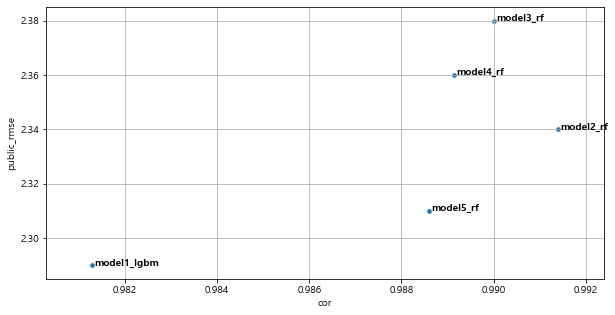

In [123]:
plt.figure(figsize=(10,5))
# 점의 사이즈가 30인 산점도 그래프
graph = sns.scatterplot(x="cor", y="public_rmse", data=score_df, s=30)
# 각 점에 대한 모델명 표시
for idx in range(0, score_df.shape[0]):
    graph.text(score_df.cor[idx]+0.00005 , score_df.public_rmse[idx]-0.00003, 
               score_df.model[idx], horizontalalignment='left', 
               size='medium', color='black', weight='semibold')
plt.xlim((score_df.cor.min()-0.001, score_df.cor.max()+0.001)) # x축 범위 지정
plt.ylim((score_df.public_rmse.min()-0.005, score_df.public_rmse.max()+0.005)) # y축 범위 지정
plt.grid() # 격자 무늬
plt.show()

#### 3.5.1.2. 여러 가지 앙상블 기법

In [124]:
ensemble_dir = "C:/dacon/ch03/submission/Ensemble1/"

# Ensemble1 폴더가 없다면 Ensemble1 폴더를 생성
if not os.path.isdir(ensemble_dir):
    os.mkdir(ensemble_dir)

# Ensemble1 폴더로 파일 이동
import shutil
shutil.move(sub_dir + 'model1_lgbm=2.29.csv', ensemble_dir + 'model1_lgbm=2.29.csv')
shutil.move(sub_dir + 'model5_rf=2.31.csv', ensemble_dir + 'model5_rf=2.31.csv')

# model1_lgbm=2.29.csv, model5_rf=2.31.csv 멱 평균
nf = 0
for f in os.listdir(ensemble_dir):
    ext = os.path.splitext(f)[-1] # 'Ensemble1' 폴더에 있는 파일의 확장자를 분리

    if ext == '.csv': 
        sub = pd.read_csv(ensemble_dir + f) # 확장자명이 .csv라면 해당 데이터를 로드
    else: 
        continue # 확장자명이 .csv가 아니라면 for문을 종료

    if len(sub.columns) !=2:
        continue # 로드한 데이터의 변수의 수가 2개가 아니라면 for문을 종료

    # 파일의 확장자명이 .csv이고, 변수의 수가 2개인 경우에만 밑의 조건문이 실행됩니다.
    if nf == 0:
        sub_df = sub # nf가 0이면 해당 데이터(sub)를 sub_df 에 저장
    else: 
        sub_df = pd.merge(sub_df, sub, on="id") # nf가 0이 아니면 해당 데이터를 sub_df와 병합
    
    nf += 1

p = 21 # 하이퍼파라미터이므로 최적의 값을 찾아야 합니다.

# 파일의 개수(nf)가 2개 이상인 경우에만 밑의 조건문이 실행됩니다.
if nf >= 2: 
    pred = 0
    
    # 앞서 소개한 멱 평균의 식을 나타낸 코드입니다.
    for j in range(nf):
        pred = pred + sub_df.iloc[:,j+1]**p
    pred = pred / nf    
    pred = pred**(1/p)
    
    # 멱 평균 결과를 대입하여 데이터프레임 submit을 생성하고, csv파일로 저장 
    submit = pd.DataFrame({'id': sub_df.id, '18~20_ride': pred})
    fname = "ensemble_model1+model5.csv"
    submit.to_csv(fname, index=False)
    
    print(fname + '가 저장되었습니다!')

ensemble_model1+model5.csv가 저장되었습니다!


In [125]:
ensemble_dir = "C:/dacon/ch03/submission/Ensemble2/"

# Ensemble2 폴더가 없다면 Ensemble2 폴더를 생성
if not os.path.isdir(ensemble_dir):
    os.mkdir(ensemble_dir)

# Ensemble2 폴더로 파일 이동
import shutil
shutil.move(sub_dir + 'model2_rf=2.34.csv', ensemble_dir + 'model2_rf=2.34.csv')
shutil.move(sub_dir + 'model4_rf=2.36.csv', ensemble_dir + 'model4_rf=2.36.csv')

# model2_rf=2.34.csv, model4_rf=2.36.csv 멱 평균
nf = 0
for f in os.listdir(ensemble_dir):
    ext = os.path.splitext(f)[-1] # 'Ensemble2' 폴더에 있는 파일의 확장자를 분리

    if ext == '.csv': 
        sub = pd.read_csv(ensemble_dir + f) # 확장자명이 .csv라면 해당 데이터를 로드
    else: 
        continue # 확장자명이 .csv가 아니라면 for문을 종료

    if len(sub.columns) !=2:
        continue # 로드한 데이터의 변수의 수가 2개가 아니라면 for 문을 종료

    # 파일의 확장자명이 .csv이고, 변수의 수가 2개인 경우에만 밑의 조건문이 실행됩니다.
    if nf == 0:
        sub_df = sub # nf가 0이면 해당 데이터(sub)를 sub_df 에 저장
    else: 
        sub_df = pd.merge(sub_df, sub, on="id") # nf가 0이 아니면 해당 데이터를 sub_df와 병합
    
    nf += 1

p = 21 # 하이퍼파라미터이므로 최적의 값을 찾아야 합니다.

# 파일의 개수(nf)가 2개 이상인 경우에만 밑의 조건문이 실행됩니다.
if nf >= 2: 
    pred = 0
    
    # 앞서 소개한 멱 평균의 식을 나타낸 코드입니다.
    for j in range(nf):
        pred = pred + sub_df.iloc[:,j+1]**p
    pred = pred / nf    
    pred = pred**(1/p)

    # 멱 평균 결과를 대입하여 데이터프레임 submit을 생성하고, csv 파일로 저장
    submit = pd.DataFrame({'id': sub_df.id, '18~20_ride': pred})
    fname = "ensemble_model2+model4.csv"
    submit.to_csv(fname, index=False)
    
    print(fname + '가 저장되었습니다!')

ensemble_model2+model4.csv가 저장되었습니다!


In [126]:
# 앙상블 파일 로드
first = pd.read_csv('ensemble_model1+model5.csv')
second = pd.read_csv('ensemble_model2+model4.csv')
third = pd.read_csv('model3_rf=2.38.csv')

# 가중산술평균
w_mean = 0.22*first['18~20_ride'] + 0.30*second['18~20_ride'] + 0.48*third['18~20_ride']

# 최종 submission 파일 생성
sub['18~20_ride'] = w_mean
sub.to_csv('final_submission.csv', index=False)